# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | port isabel
Processing Record 4 of Set 1 | sinop
Processing Record 5 of Set 1 | rosario
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | kroya
Processing Record 11 of Set 1 | katsuren-haebaru
Processing Record 12 of Set 1 | palmerston
Processing Record 13 of Set 1 | bar
Processing Record 14 of Set 1 | holualoa
Processing Record 15 of Set 1 | antonio enes
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | cole harbour
Processing Record 22 of Set 1 | lebanon
Processing Record 23 of 

Processing Record 39 of Set 4 | edson
Processing Record 40 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 41 of Set 4 | port mathurin
Processing Record 42 of Set 4 | nizhnyaya tavda
Processing Record 43 of Set 4 | beloyarskiy
Processing Record 44 of Set 4 | afaahiti
Processing Record 45 of Set 4 | gretna
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | ceeldheer
Processing Record 48 of Set 4 | fabijoniskes
City not found. Skipping...
Processing Record 49 of Set 4 | taupo
Processing Record 0 of Set 5 | midvagur
Processing Record 1 of Set 5 | kulia village
City not found. Skipping...
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | ushtobe
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | temozon
Processing Record 6 of Set 5 | susuman
Processing Record 7 of Set 5 | tommot
Processing Record 8 of Set 5 | yamada
Processing Record 9 of Set 5 | port macquarie
Processing Record 10 of Set 5 | remire-montjol

Processing Record 28 of Set 8 | hammerfest
Processing Record 29 of Set 8 | buon ma thuot
Processing Record 30 of Set 8 | miles city
Processing Record 31 of Set 8 | manali
Processing Record 32 of Set 8 | arroyito
Processing Record 33 of Set 8 | fang
Processing Record 34 of Set 8 | san julian
Processing Record 35 of Set 8 | nogliki
Processing Record 36 of Set 8 | petropavlovsk-kamchatsky
Processing Record 37 of Set 8 | pauini
Processing Record 38 of Set 8 | yagry
City not found. Skipping...
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | ulaangom
Processing Record 41 of Set 8 | ust-nera
Processing Record 42 of Set 8 | karratha
Processing Record 43 of Set 8 | mugumu
Processing Record 44 of Set 8 | poronaysk
Processing Record 45 of Set 8 | kingston
Processing Record 46 of Set 8 | agnibilekrou
Processing Record 47 of Set 8 | mareeba
Processing Record 48 of Set 8 | mbuji-mayi
Processing Record 49 of Set 8 | castiglione del lago
Processing Record 0 of Set 9 | petropavl

Processing Record 19 of Set 12 | port glaud
City not found. Skipping...
Processing Record 20 of Set 12 | kamiiso
Processing Record 21 of Set 12 | yondo
Processing Record 22 of Set 12 | celldomolk
Processing Record 23 of Set 12 | branson
Processing Record 24 of Set 12 | darwin
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | nar'yan-mar
Processing Record 27 of Set 12 | nuuk
Processing Record 28 of Set 12 | toga village
City not found. Skipping...
Processing Record 29 of Set 12 | saint-paul
Processing Record 30 of Set 12 | concordia
Processing Record 31 of Set 12 | zhumysker
Processing Record 32 of Set 12 | dali
Processing Record 33 of Set 12 | forestdale
Processing Record 34 of Set 12 | askoy
Processing Record 35 of Set 12 | fisterra
Processing Record 36 of Set 12 | vallenar
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474397
1,salalah,17.0151,54.0924,84.29,74,0,8.05,OM,1683474397
2,port isabel,26.0734,-97.2086,87.03,75,0,17.27,US,1683474397
3,sinop,41.7711,34.8709,49.66,95,100,5.77,TR,1683474398
4,rosario,-32.9468,-60.6393,70.83,47,0,6.91,AR,1683474266


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474397
1,salalah,17.0151,54.0924,84.29,74,0,8.05,OM,1683474397
2,port isabel,26.0734,-97.2086,87.03,75,0,17.27,US,1683474397
3,sinop,41.7711,34.8709,49.66,95,100,5.77,TR,1683474398
4,rosario,-32.9468,-60.6393,70.83,47,0,6.91,AR,1683474266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

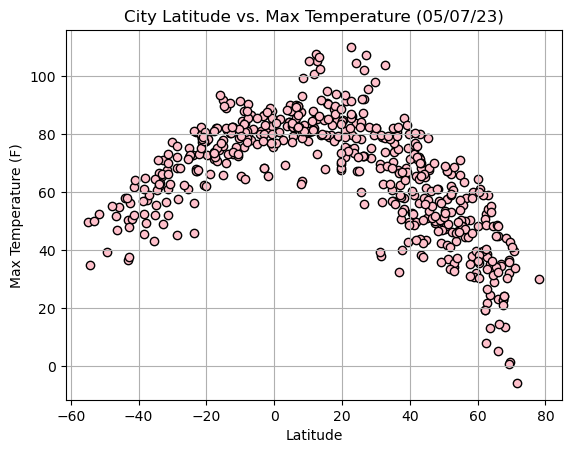

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolors="black",facecolors="pink")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

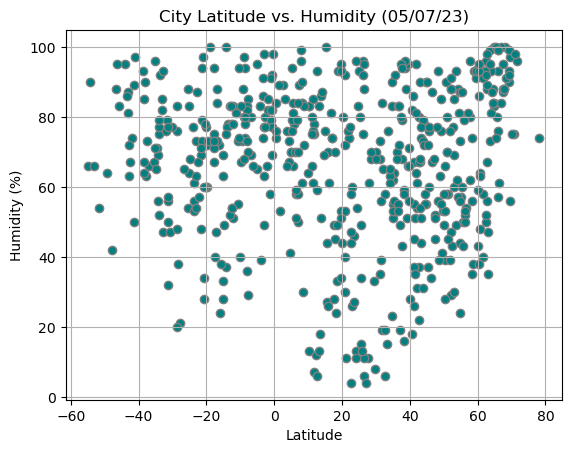

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolors="grey",facecolors="teal")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

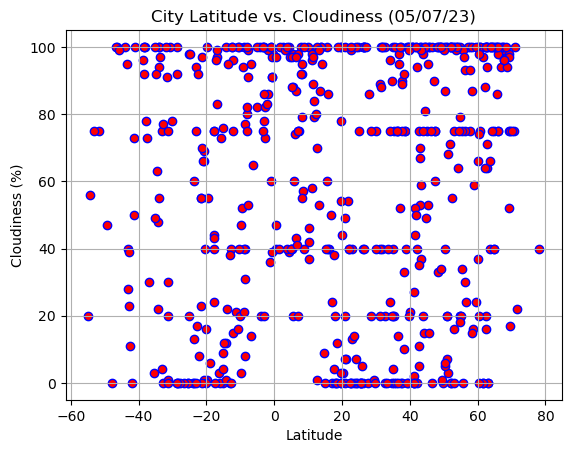

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolors="blue",facecolors="red")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

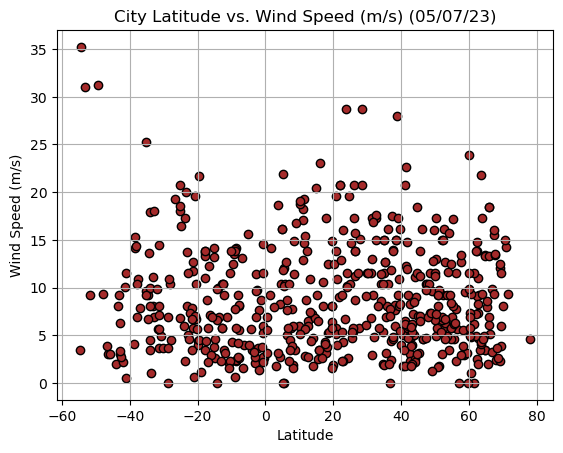

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolors="black",facecolors="brown")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (m/s) ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid (True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
CorCalc=round(linregress(city_data_df["Lat"],city_data_df["Max Temp"])[0],2)

line=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
line

LinregressResult(slope=-0.27159217532124436, intercept=70.77168676126311, rvalue=-0.45858716633906965, pvalue=2.8997509706356597e-30, stderr=0.02235995584195111, intercept_stderr=0.8513008578916912)

In [20]:
slope = -0.3010018716785547
intercept = 68.37353445414819

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,salalah,17.0151,54.0924,84.29,74,0,8.05,OM,1683474397
2,port isabel,26.0734,-97.2086,87.03,75,0,17.27,US,1683474397
3,sinop,41.7711,34.8709,49.66,95,100,5.77,TR,1683474398
6,bilibino,68.0546,166.4372,13.44,100,98,2.39,RU,1683474398
10,katsuren-haebaru,26.3369,127.8719,72.37,96,40,13.80,JP,1683474400


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474397
4,rosario,-32.9468,-60.6393,70.83,47,0,6.91,AR,1683474266
5,puerto natales,-51.7236,-72.4875,52.25,54,75,9.22,CL,1683474123
7,inhambane,-23.8650,35.3833,72.66,77,0,5.93,MZ,1683474399
8,blackmans bay,-43.0167,147.3167,36.52,87,28,6.31,AU,1683474399


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8230907253931093


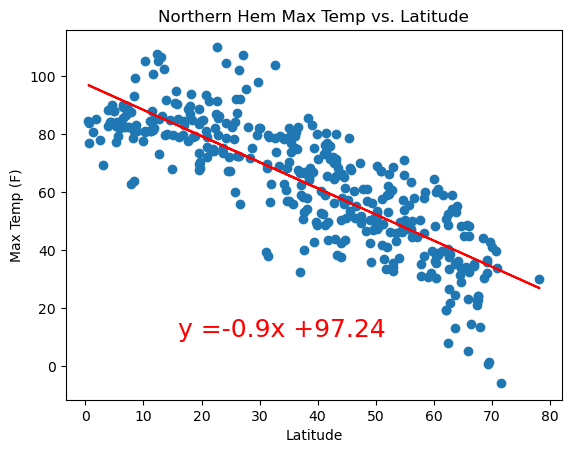

In [23]:
# Linear regression on Northern Hemisphere
x_line = pd.to_numeric(north_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(north_hem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (16,10),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hem Max Temp vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig5.png")
plt.show()

The r-value is: 0.805179412073875


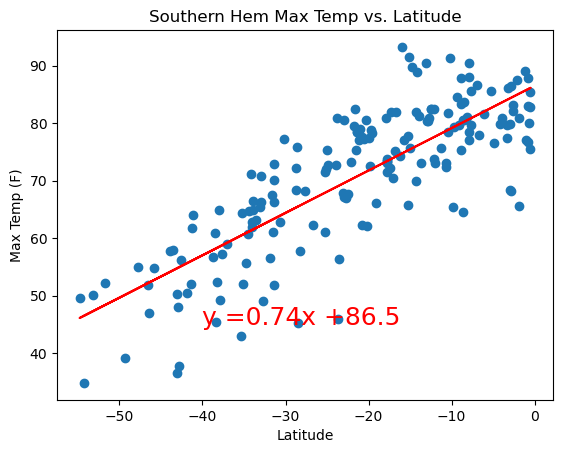

In [24]:
# Linear regression on Southern Hemisphere
x_line = pd.to_numeric(south_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(south_hem_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (-40,45),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hem Max Temp vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** It is apparant, after running the scatterplots for both the norhtern and southern hemispheres, that there is a correlation between lattitude and the temperature. For a latitude closer to and away from zero towards the negatives, the temperature drops. It is the oppisite for the latitude moving above zero, found in the norhtern hemisphere. Those tempuratures appear to increase the higher above zero latitude becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18021085283480887


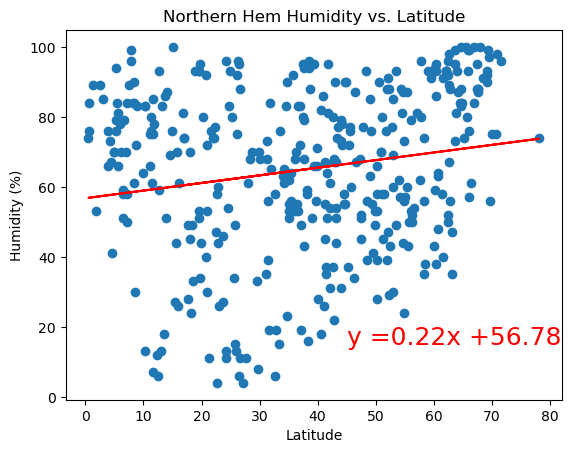

In [28]:
# Northern Hemisphere
x_line = pd.to_numeric(north_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(north_hem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (45,15),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hem Humidity vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.038906879300071556


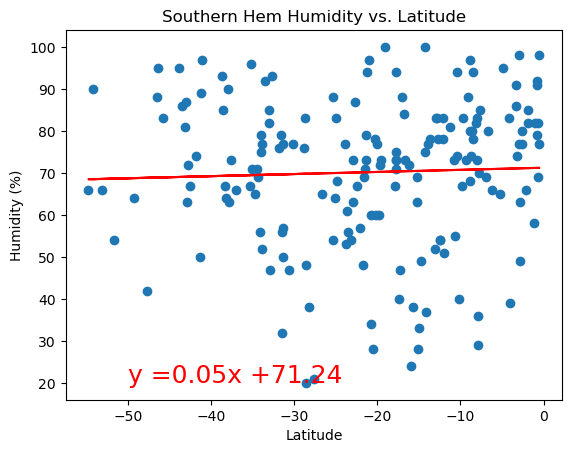

In [30]:
# Southern Hemisphere
x_line = pd.to_numeric(south_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(south_hem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (-50,20),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hem Humidity vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** When it comes to the data observed for humidity in the Northern hemsiphere, it appears that humidity directly correlates positively to latitude. As the latitude increases and we move further away from the equator in the Northern hemisphere, we see an increase in humidity. Conversely, as we move closer to the equator and the latitude increases, we do not see any correlation with humidity in the Southern hemisphere. The humidity in the southern hemisphere appears to be inconsistent and have no patterns to recognize.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11420835607753195


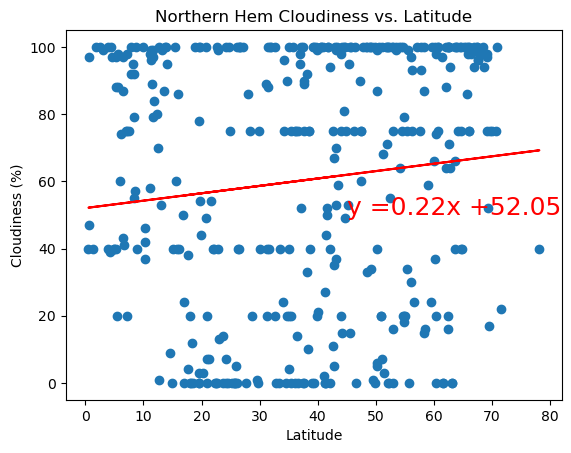

In [38]:
# Northern Hemisphere
x_line = pd.to_numeric(north_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(north_hem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (45,50),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hem Cloudiness vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.07633354450231421


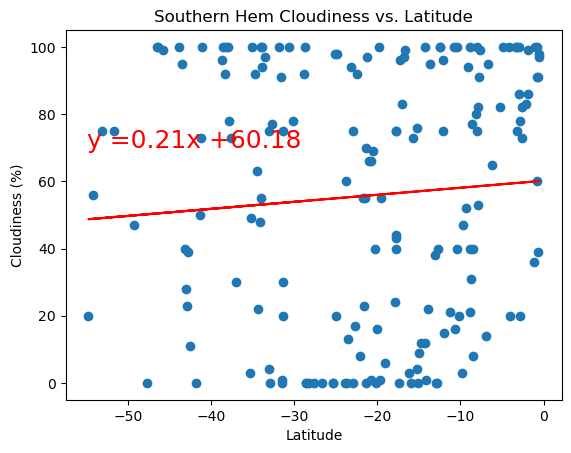

In [37]:
# Southern Hemisphere
x_line = pd.to_numeric(south_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(south_hem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (-55,70),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hem Cloudiness vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** When it comes to cloudiness in the Northern vs Southern hemispheres and how it correlates to the latitudes toward or away from the equator, there appears to be none. The main observation I have is the northern hemisphere has overall more cloudiness in comparison to the southern hemisphere. The latitude does not seem to impact cloudiness on either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06614286469616008


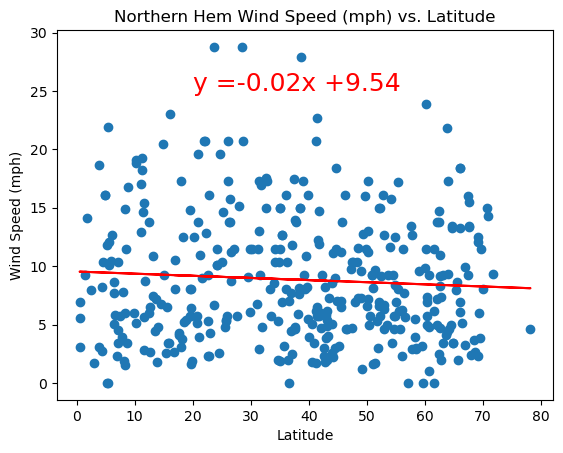

In [41]:
# Northern Hemisphere
x_line = pd.to_numeric(north_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(north_hem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (20,25),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hem Wind Speed (mph) vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: -0.24635609148698084


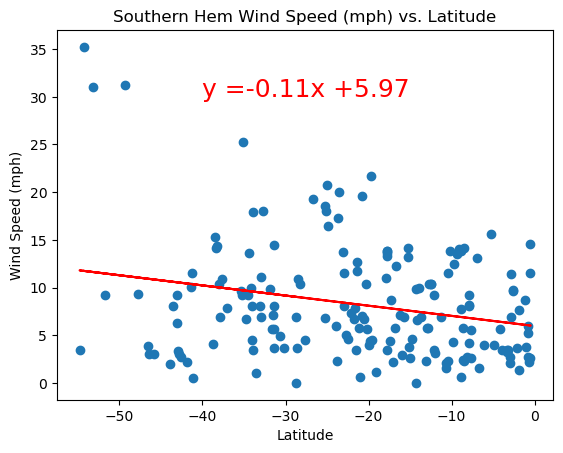

In [43]:
# Southern Hemisphere
x_line = pd.to_numeric(south_hem_df['Lat']).astype(float)
y_line = pd.to_numeric(south_hem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress = x_line * slope + intercept
line_equ = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_line,y_line)
plt.plot(x_line,regress,"r-")
plt.annotate(line_equ, (-40,30),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hem Wind Speed (mph) vs. Latitude")

print(f"The r-value is: {rvalue}")
      
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** As latitude increases in both the Northern and Southern hemispheres, there seems to be no correllation with wind speeds. As we approach the equator from the southern hemisphere, the wind speed reduces. But, as we move past the equator in the northern hemisphere towards higher latitudes, the wind speed starts to level off and remain consistent.